<a href="https://colab.research.google.com/github/yayie77/Concepts-and-Technologies-of-AI/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time

##Problem - 1: Perform a classification task with knn from scratch.


###1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [1]:
df=pd.read_csv("/content/drive/MyDrive/Intoduction to AI and Technologies/Week4/Copy of diabetes.csv")
df.head()
# Checking data types
df.dtypes
# Listing columns
df.columns
# Missing values
missing_val= df.isnull().sum()/len(df)*100
missing_val
# Summary statistics
print(f"\nSummary Statistics for Numerical Columns: ")
print(df.describe())

categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"\nSummary Statistics for Categorical Columns: ")
    print(df[categorical_cols].describe())
else:
    print("\nNo categorical columns found in the dataset.")



NameError: name 'pd' is not defined

###2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [ ]:
#Handle missing values
for column in df.columns:
  if missing_val[column]>10:
    df[column].fillna(df[column].mean(),inplace=True)
  else:
    df.dropna(subset=[column],inplace=True)

# Displaying handled datas
print(f"\nMisiing values after handling values", df.isnull().sum())



Misiing values after handling values Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


###3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [ ]:
# Seperating X and Y
x = df.drop(columns=['Outcome']).values
y = df['Outcome'].values
# Defining function for train_test split from scratch
def train_test_split_scratch(x,y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)

  test_split_size=int(x.shape[0]*test_size)
  test_indices=indices[:test_split_size]
  train_indices=indices[test_split_size:]

  x_train=x[train_indices]
  y_train=y[train_indices]
  x_test=x[test_indices]
  y_test=y[test_indices]
  return x_train, x_test, y_train, y_test
# Perform test-train split
x_train, x_test, y_train, y_test = train_test_split_scratch(x, y, test_size=0.3)
# Output
print(f"Shape of X_train: {x_train.shape}")
print(f"Shape of X_test: {x_test.shape}")
print(f"Shape of Y_train: {y_train.shape}")
print(f"Shape of Y_test: {y_test.shape}")


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of Y_train: (538,)
Shape of Y_test: (230,)


###4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.
– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [ ]:
# Computing Euclidean Distance Mectris
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance")
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

In [ ]:
# Predict class lable for single query
# Function for kNN prediction for a single query

def knn_predict_single(query, x_train, y_train, k=3):
  distances = [euclidean_distance(query, x)for x in x_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

# Function to text KNN for all test samples

def knn_predict(x_test, x_train, y_train, k=3):
  predictions = [knn_predict_single(x, x_train, y_train, k)for x in x_test]
  return np.array(predictions)

In [ ]:
# Computing Accracy

def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy
  # Perform prediction on entire test
try:
  predictions = knn_predict(x_test, x_train, y_train, k=3)
  accuracy = compute_accuracy(y_test, predictions)
  print(f"Accuracy: {accuracy: .2f}%")
except Exception as e:
  print(f"An error occured: {e}")

Accuracy:  67.39%


#Problem - 2 - Experimentation:

### 1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Perform prediction on the scaled test data
try:
    predictions = knn_predict(x_test, x_train, y_train, k=3)
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy after scaling: {accuracy:.2f}%")
except Exception as e:
    print(f"An error occurred: {e}")


Accuracy after scaling: 70.87%


In [ ]:
def scale_data(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)

    x_scaled = (x - mean) / std
    return x_scaled

x_test_scaled = scale_data(x_test)
x_train_scaled = scale_data(x_train)
predictions = knn_predict(x_test_scaled, x_train_scaled, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")

Accuracy of the KNN model on the test set: 71.30%


###2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.


• Discuss:

– How scaling impacted the KNN performance.

ans:


– The reason for any observed changes in accuracy:

1.Distance Metric Sensitivity

2.Improved Generalization for k=3

3.Feature contribution equality

#Problem - 3 - Experimentation with k:

**1. Vary the number of neighbors - k:**

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15


• For each k, record:

– Accuracy.

– Time taken to make predictions.



**2. Visualize the Results:**

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.



**3. Analyze and Discuss:**

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

Accuracy for k=1 (Original Data): 63.48%
Oringal Time: : 1.4999916553497314
Accuracy for k=1 (Scaled Data): 62.61%
Scaled Time: : 0.8057899475097656
Accuracy for k=2 (Original Data): 66.09%
Oringal Time: : 0.8275444507598877
Accuracy for k=2 (Scaled Data): 68.70%
Scaled Time: : 0.7996375560760498
Accuracy for k=3 (Original Data): 70.87%
Oringal Time: : 0.8145999908447266
Accuracy for k=3 (Scaled Data): 71.30%
Scaled Time: : 0.8067426681518555
Accuracy for k=4 (Original Data): 68.70%
Oringal Time: : 0.8219730854034424
Accuracy for k=4 (Scaled Data): 69.57%
Scaled Time: : 0.8140392303466797
Accuracy for k=5 (Original Data): 70.00%
Oringal Time: : 0.7980732917785645
Accuracy for k=5 (Scaled Data): 71.74%
Scaled Time: : 0.854210615158081
Accuracy for k=6 (Original Data): 69.13%
Oringal Time: : 0.8355216979980469
Accuracy for k=6 (Scaled Data): 70.43%
Scaled Time: : 0.8165116310119629
Accuracy for k=7 (Original Data): 69.57%
Oringal Time: : 0.8722734451293945
Accuracy for k=7 (Scaled Data):

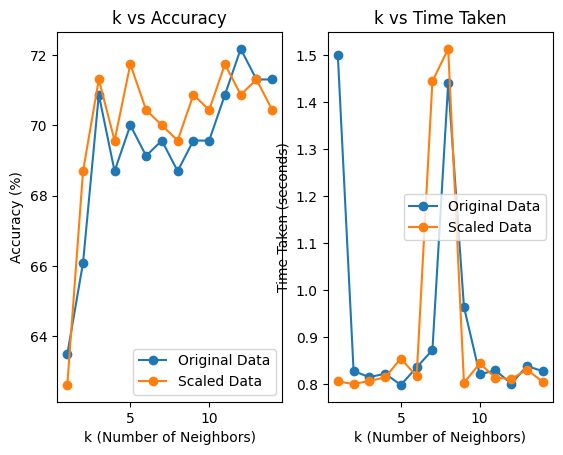

In [ ]:
# Function to test KNN on different values of k and plot the accuracies
def experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values):
    original_accuracies = []
    scaled_accuracies = []
    original_times = []
    scaled_times = []

    for k in k_values:
        start_time = time.time()
        predictions_original = knn_predict(x_test, x_train, y_train, k)
        original_time = time.time() - start_time
        original_accuracy = compute_accuracy(y_test, predictions_original)

        x_train_scaled = scale_data(x_train)
        x_test_scaled = scale_data(x_test)
        start_time = time.time()
        predictions_scaled = knn_predict(x_test_scaled, x_train_scaled, y_train, k)
        scaled_time = time.time() - start_time
        scaled_accuracy = compute_accuracy(y_test, predictions_scaled)

        original_accuracies.append(original_accuracy)
        scaled_accuracies.append(scaled_accuracy)
        original_times.append(original_time)
        scaled_times.append(scaled_time)

        print(f"Accuracy for k={k} (Original Data): {original_accuracy:.2f}%")
        print(f"Oringal Time: : {original_time}")
        print(f"Accuracy for k={k} (Scaled Data): {scaled_accuracy:.2f}%")
        print(f"Scaled Time: : {scaled_time}")

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(k_values, original_accuracies, label='Original Data', marker='o')
    plt.plot(k_values, scaled_accuracies, label='Scaled Data', marker='o')
    plt.title('k vs Accuracy')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    # Time Plot
    plt.subplot(1, 2, 2)
    plt.plot(k_values, original_times, label='Original Data', marker='o')
    plt.plot(k_values, scaled_times, label='Scaled Data', marker='o')
    plt.title('k vs Time Taken')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Time Taken (seconds)')
    plt.legend()

    return original_accuracies, scaled_accuracies

# Define the range of k values to experiment with
k_values = range(1, 15)  # You can adjust this range as needed

# Run the experiment
try:
    original_accuracies, scaled_accuracies = experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")

Analyze and Discuss:

1.Accuracy
- For small values for k,the model acheives lower accuracy due to overfitting

- For larger values for k , the accuracy stabilize and improves by reducing sensitivity of noise and outliers.

- For excessively large k can reduce accuracy because model may over generalizes and might belong to different classes.

2.Computation cost:
As k increases, the computational cost per query remains relatib=vely constant but in pratice, the observed time show samll fluctuation in the range of ~1.1-1.2, representingk doesnot significantly impact runtime.

***Problem - 4 - Additional Questions ***

{Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.
• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

Challenges of using KNN for large dataset and high-simensional data

1. Computational Complexity
2. Curse of Dimensionality
3. Memory Usuage
4. Sensitivity to Irrelevant Features
5. Scaling Issues


Strategy to improve effeciency of KNN:

1. Approximate Nearest Neighbors (ANN) Algorithm
2. Reducing dimension
3. Feature Selection
4. Data Partitioning
5. Parallelization
6. Distance Metric Optimization
7. Preprocessing for Scalability